In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

# **Signals**

In [12]:
from msr.data.download.ptbxl import load_ptbxl_raw_tensors_for_split, FS
from msr.data.measurements import PtbXLMeasurement

data, targets = load_ptbxl_raw_tensors_for_split("train", "diagnostic_class")
data, targets = data.numpy(), targets.numpy()
idx = 12

sample = data[idx]
measurement = PtbXLMeasurement(*sample.T, fs=FS)
measurement.set_beats(source_channel='ecg_2', align_peaks_loc=False)
measurement.set_agg_beat()

In [18]:
sig = list(measurement.signals.values())[0]
print(f"FS = {sig.fs}\nDuration = {len(data[0]) / sig.fs}")

FS = 100
Duration = 10.0


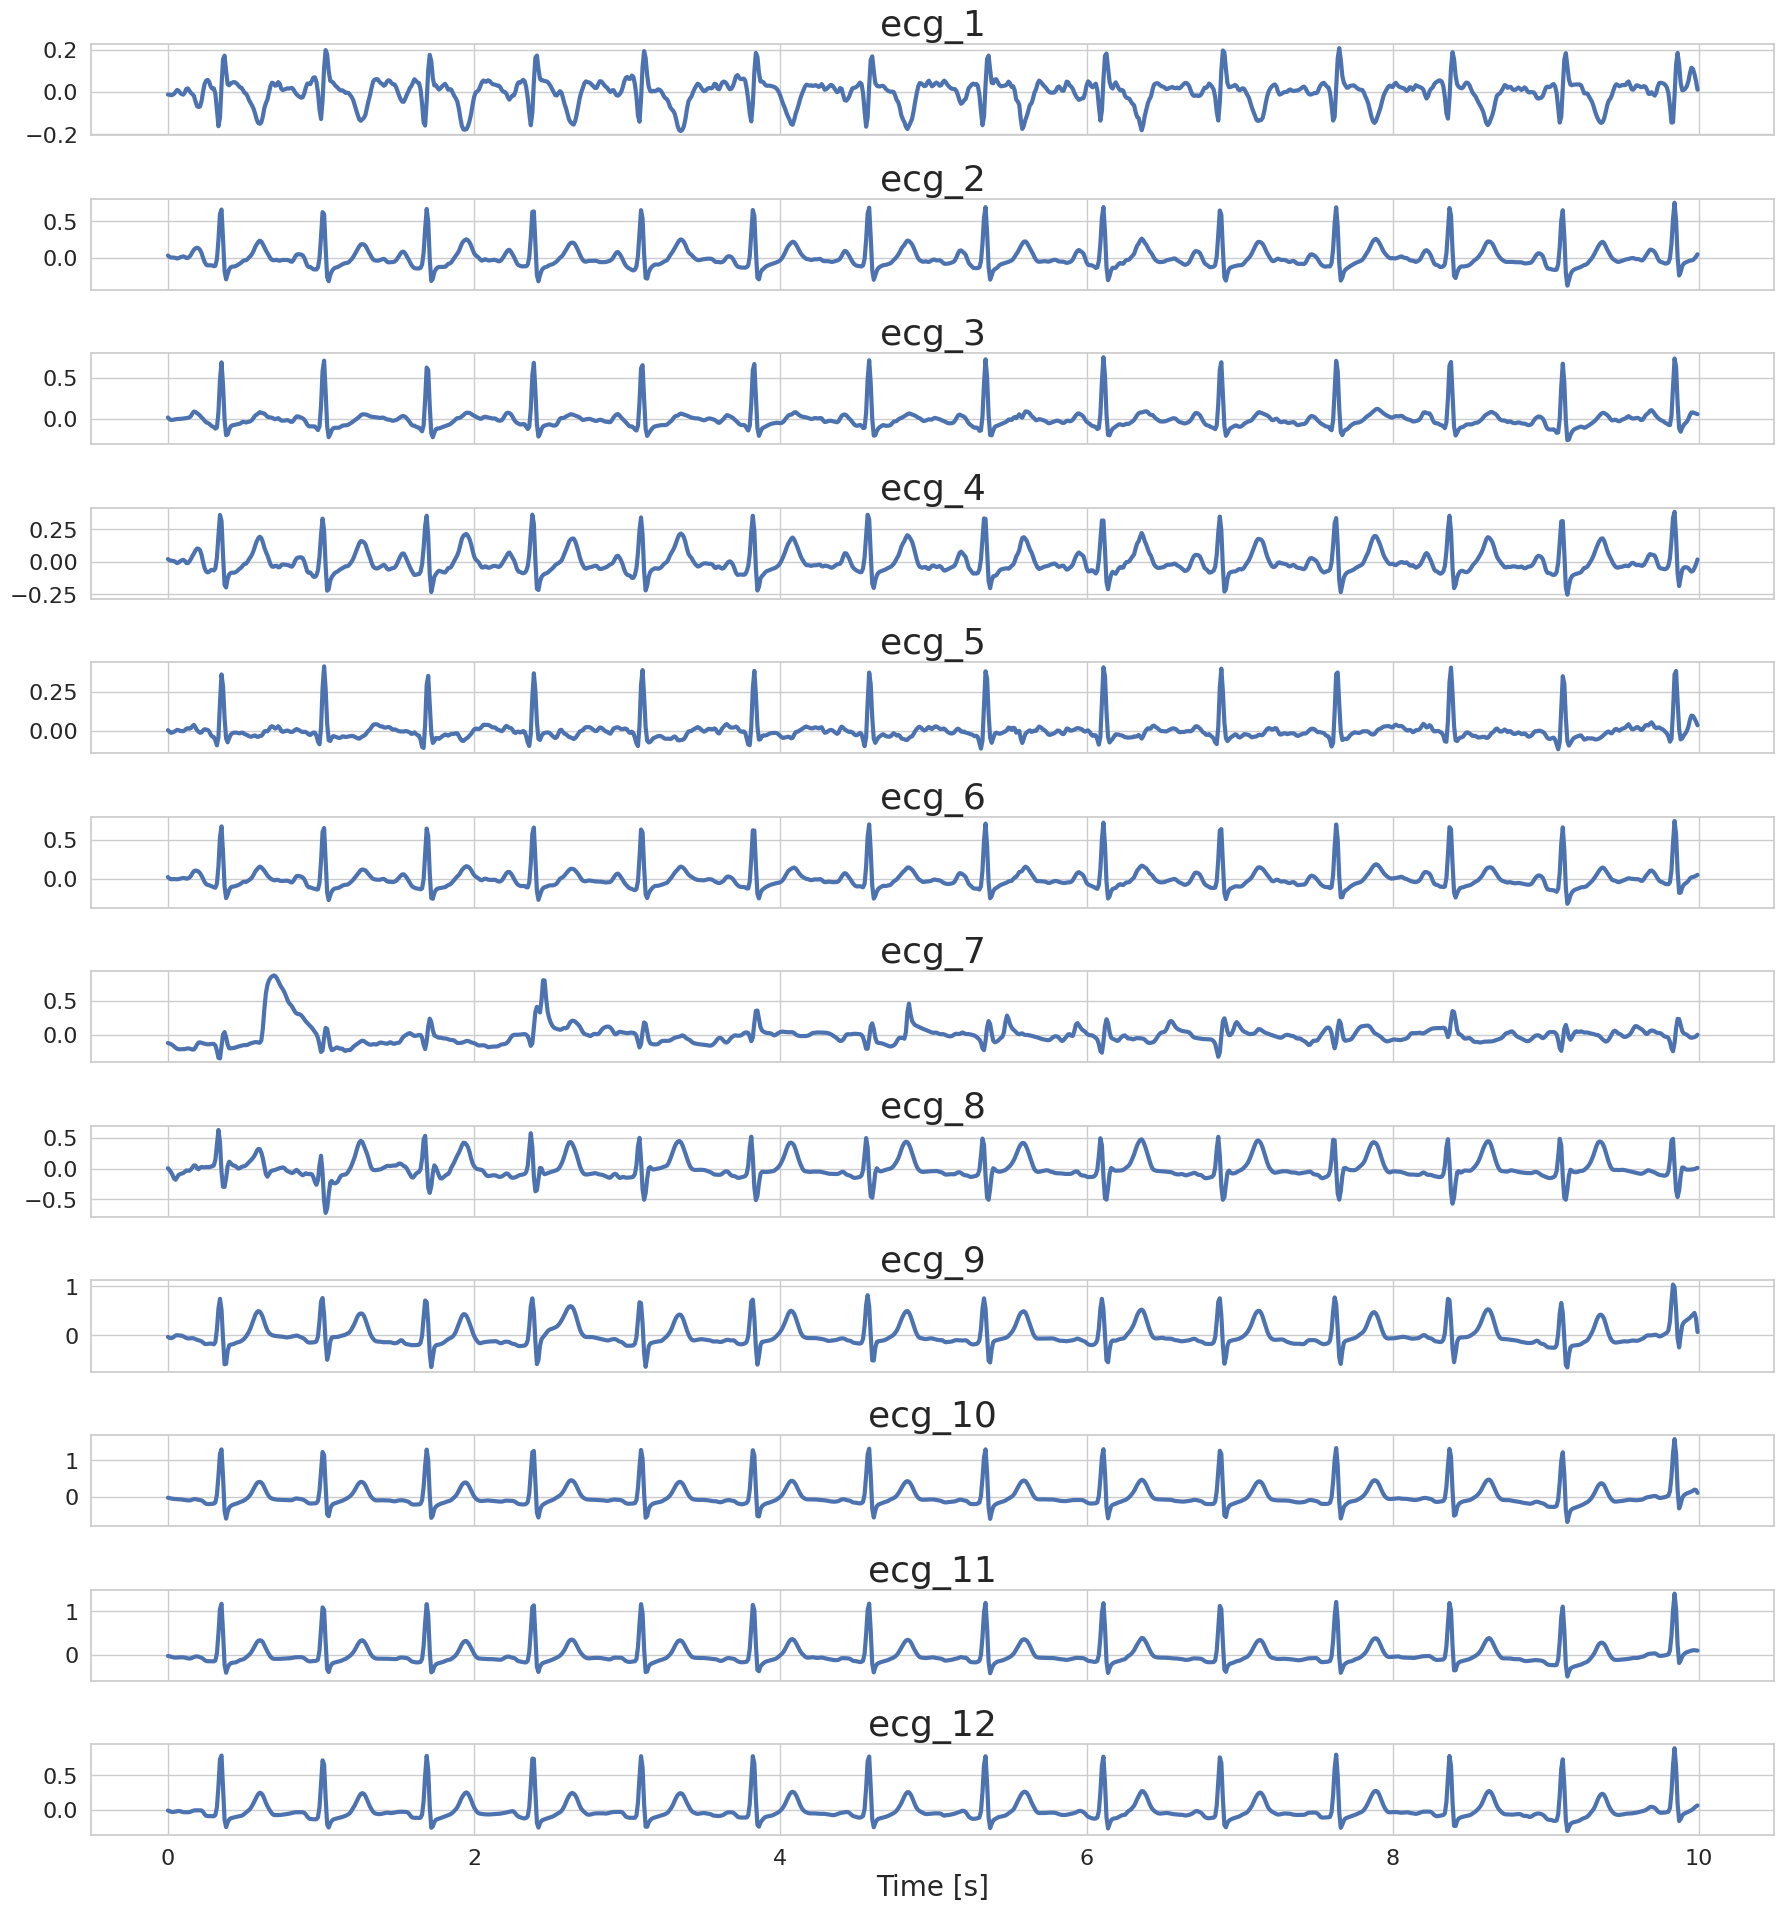

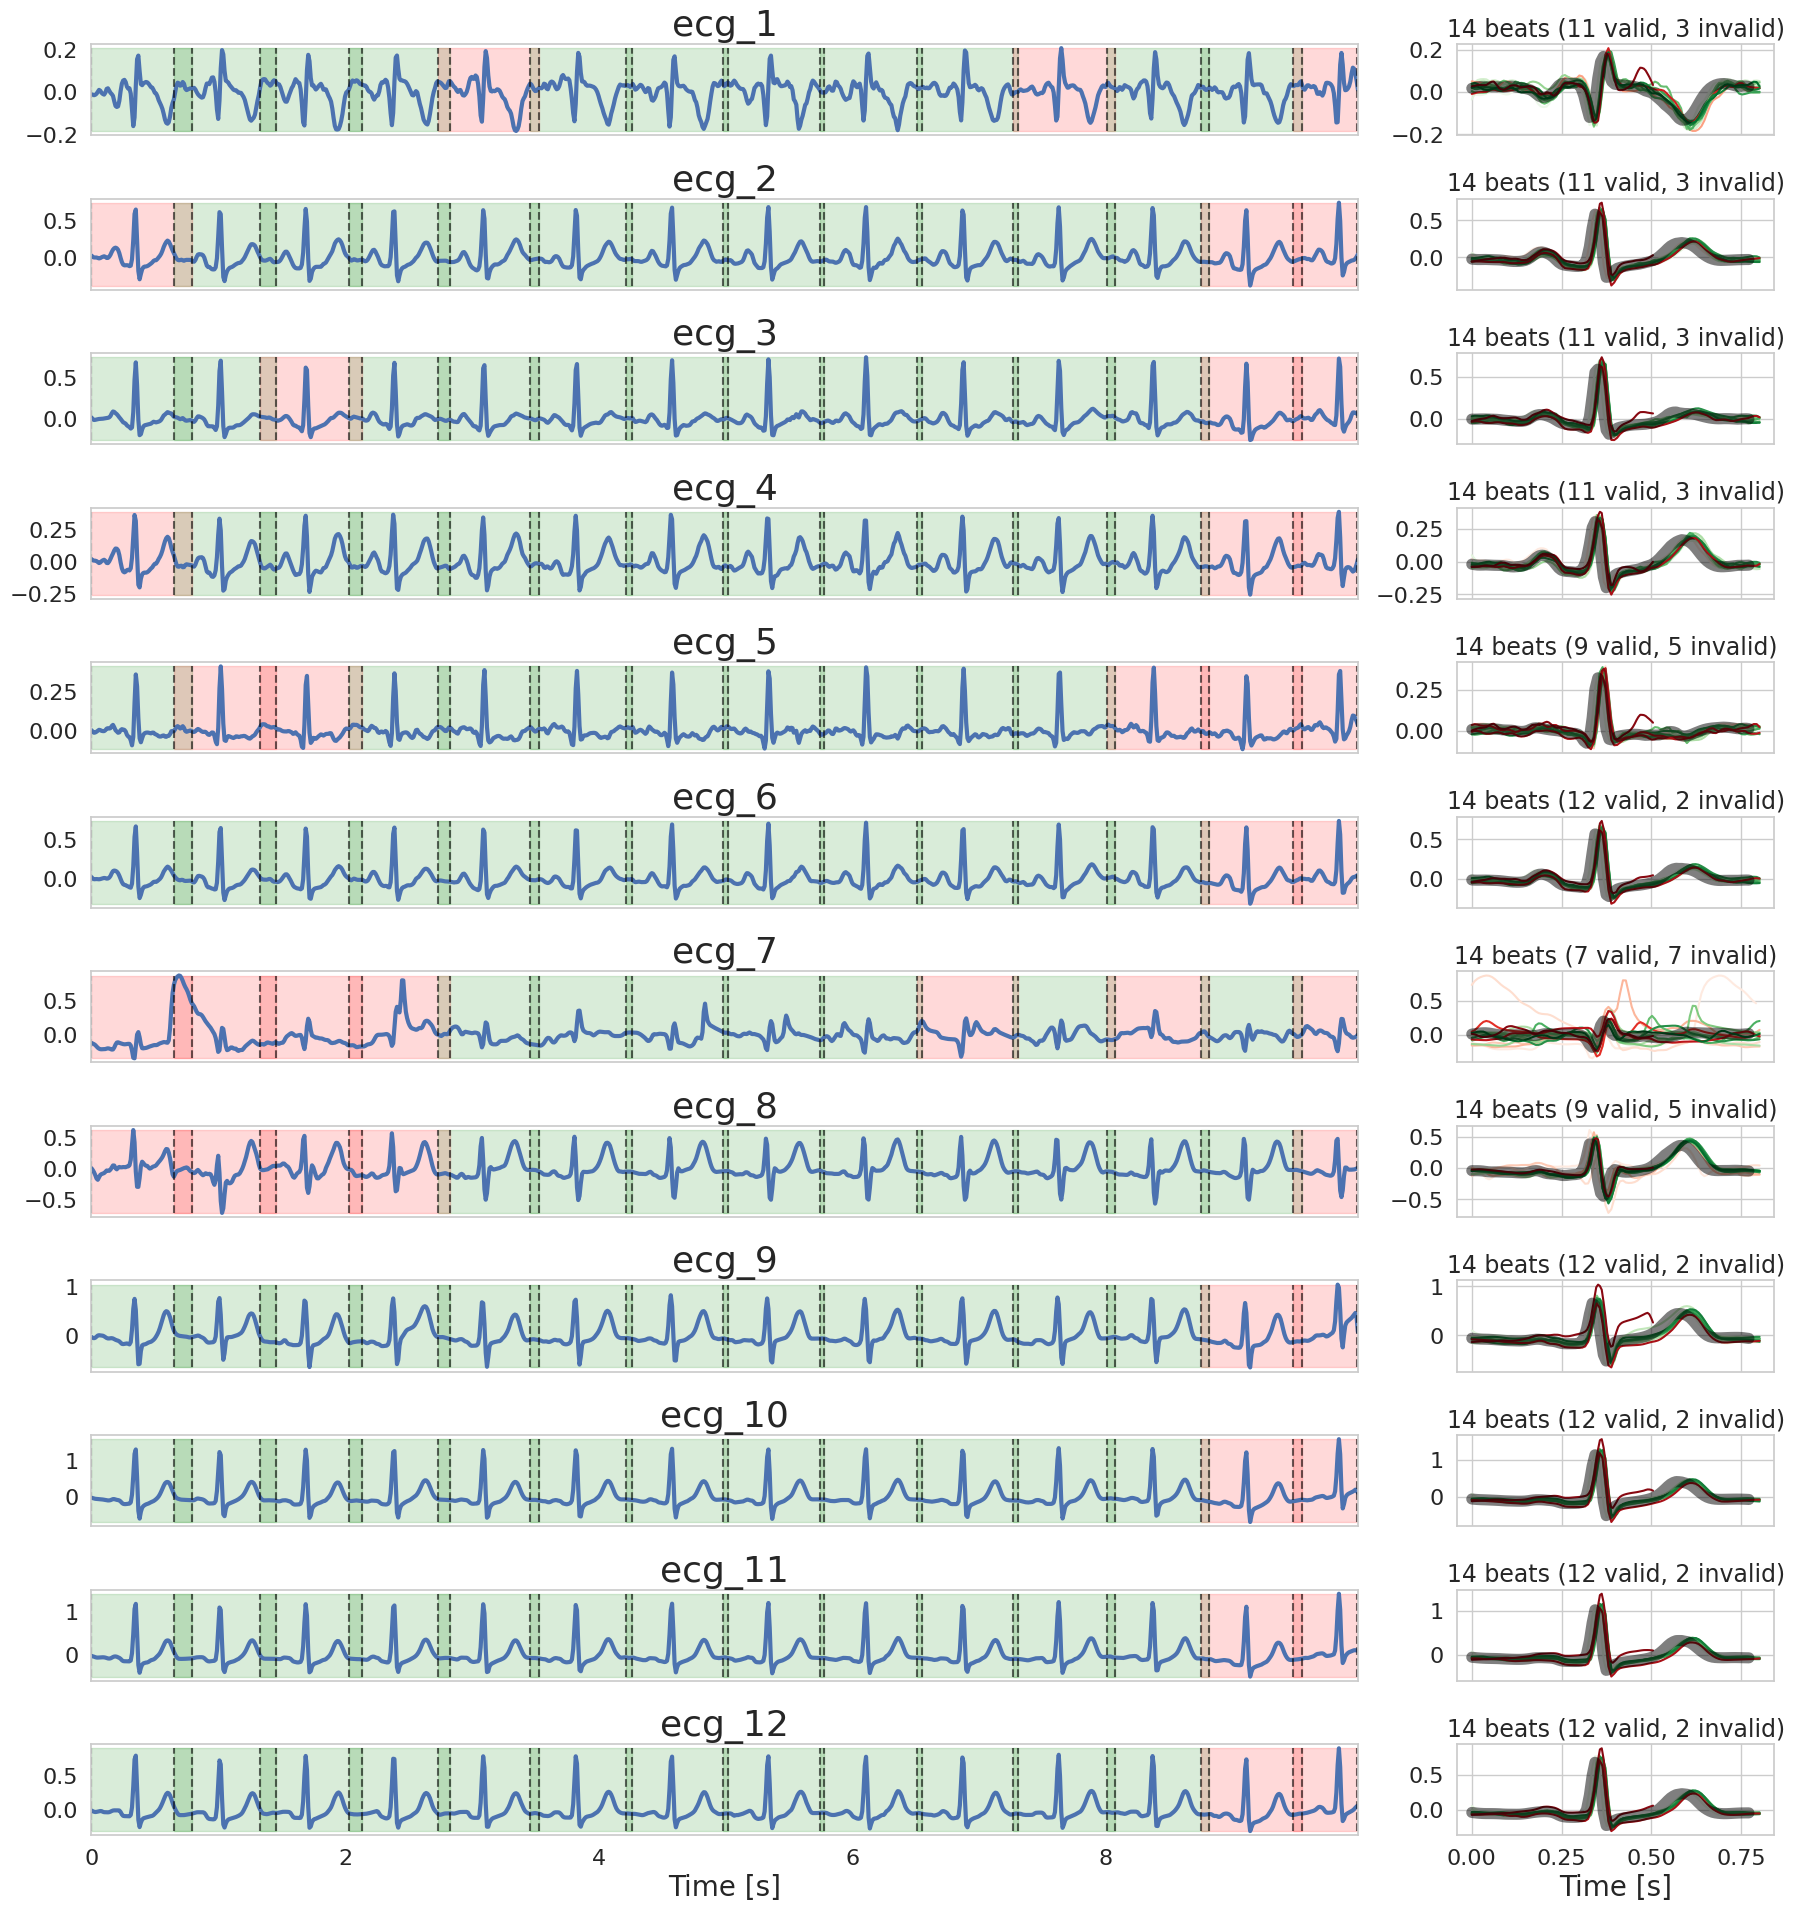

In [32]:
figs = {
    "ptbxl_signals": measurement.plot(),
    "ptbxl_beats_segmentation": measurement.plot_beats_segmentation(invalid=True, color_validity=True)
}

for name, fig in figs.items():
    fig.savefig(f"plots/{name}.pdf", bbox_inches="tight")

# **Statistics**

In [4]:
%load_ext autoreload
%autoreload 2

from msr.training.data.datamodules import PtbXLDataModule
from msr.data.download.ptbxl import FS

TARGET = "diagnostic_class"
BASE_PARAMS = dict(fs=FS, target=TARGET)

dm = PtbXLDataModule("whole_signal_features", **BASE_PARAMS)
dm.setup()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
len(dm.train) + len(dm.val) + len(dm.test)

16272

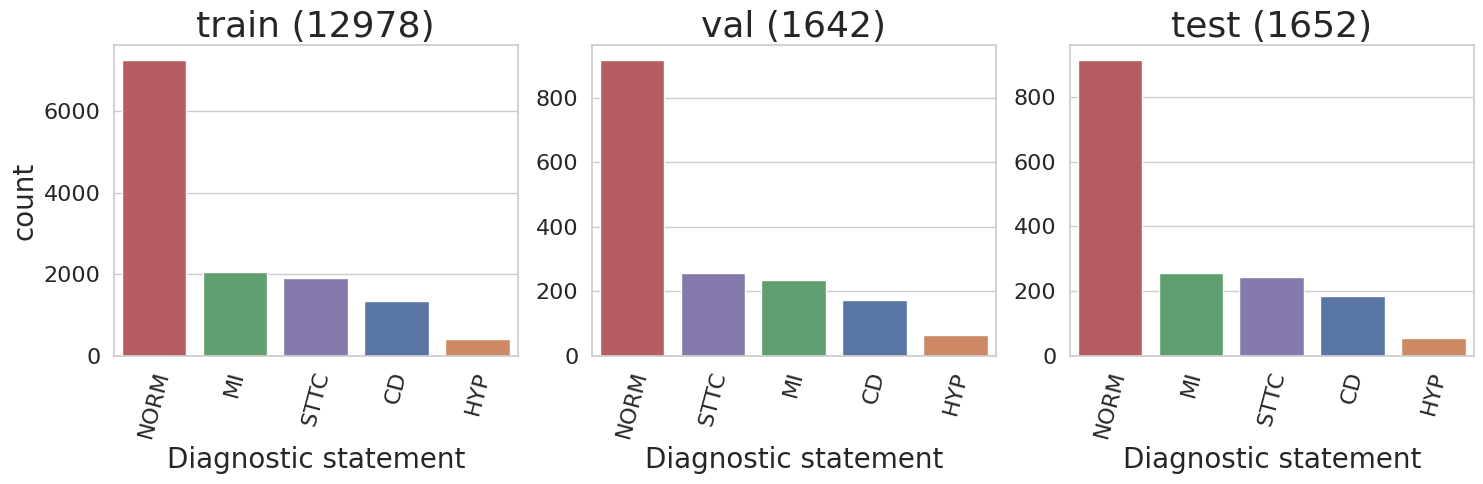

In [10]:
figs = {
    "ptbxl_statistics": dm.plot_targets(),
}

In [11]:
for name, fig in figs.items():
    fig.savefig(f"plots/{name}.pdf", bbox_inches="tight")